# Plot hyperoptimization results

## Import section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Loading base dataframe

In [9]:
# results_csv_path = "results/tox21_ptree/edge/cistrans/results.csv"
results_csv_path = "results/ba_ptree/edge/default/results.csv"

In [10]:
main_df = pd.read_csv(results_csv_path)
display(main_df)

,train_mae,train_r2,train_spearmanr,train_mse,train_rmse,train_mean_loss,train_sum_loss,val_mae,val_r2,val_spearmanr,...,pid,hostname,node_ip,time_since_restore,iterations_since_restore,config/model/hidden_dimension,config/model/modules/1/times,config/model/modules/1/parameter/dropout,config/optimizer/base_learning_rate,logdir
0,0.98,-0.89,0.43,1.64,1.28,0.977281,305.889105,1.14,-1.35,0.50,...,1080626,vader,131.130.125.97,2036.435409,15,64,3,0.5,0.00001,76c4bf9b
1,0.36,0.71,0.85,0.25,0.50,0.364035,113.942827,0.37,0.69,0.87,...,1080950,vader,131.130.125.97,21819.767588,100,256,6,0.5,0.00100,fd2b1445
2,0.58,0.33,0.67,0.58,0.76,0.581829,182.112341,0.68,0.07,0.75,...,1081196,vader,131.130.125.97,11938.643102,100,64,3,0.5,0.00001,6b8110ca
3,2.52,-9.81,0.11,9.38,3.06,2.515079,787.219626,2.04,-6.63,0.12,...,1081449,vader,131.130.125.97,1158.087053,5,64,6,0.5,0.00001,c7ed25f6
4,0.30,0.79,0.90,0.18,0.43,0.298220,93.342978,0.37,0.68,0.86,...,1081694,vader,131.130.125.97,11923.039548,100,64,3,0.0,0.00010,bed867d8
5,0.36,0.72,0.86,0.25,0.50,0.359540,112.536174,0.36,0.71,0.87,...,1082244,vader,131.130.125.97,12696.177937,100,256,3,0.5,0.00100,7dc25d61
6,1.06,-1.20,0.37,1.91,1.38,1.059618,331.660429,1.39,-2.58,0.41,...,1082560,vader,131.130.125.97,2087.891783,5,256,10,0.5,0.00010,f1076c6d
7,1.36,-2.52,0.27,3.06,1.75,1.356420,424.559451,1.22,-1.92,0.45,...,1082967,vader,131.130.125.97,2049.231482,5,256,10,0.2,0.00001,7aee3aee
8,0.54,0.43,0.73,0.50,0.70,0.536511,167.927800,0.56,0.38,0.78,...,1083817,vader,131.130.125.97,3562.255835,15,64,6,0.2,0.00010,5621fa47
9,2.77,-11.56,0.09,10.90,3.30,2.772047,867.650632,2.38,-8.22,0.05,...,1084616,vader,131.130.125.97,753.334611,5,256,3,0.5,0.00001,e5847a74


In [11]:
storage_dir = os.path.dirname(results_csv_path)

In [12]:
# load all dataframes
df_collection = {}
for trial_name in main_df.logdir:
    df_collection[trial_name] = pd.read_csv(os.path.join(storage_dir, f"{trial_name}.csv"))

## Plot all trials

In [15]:
# metric = 'auc'
metric = 'mae'

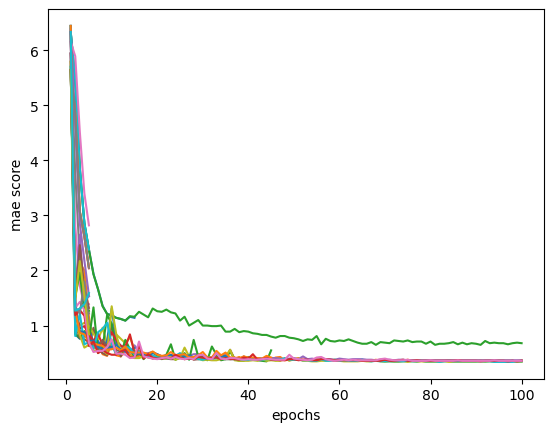

In [16]:
plt.figure()
for trial_name, trial_df in df_collection.items():
    plt.plot(trial_df.index+1, trial_df[f"val_{metric}"], label=trial_name)
# plt.title("Hyperoptimization trial progress visualization")
plt.xlabel("epochs")
plt.ylabel(f"{metric} score")
# plt.yscale("log")
plt.savefig("hyper-1.pdf")
plt.show()